In [28]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
import datetime as dt

# Contents
This notebook performs the following:
1. Exploring data: general plots / stats to further understand the data
2. Running a simple ARIMA model for estimation

In [2]:
df = pd.read_csv('./energy.dat')

In [3]:
df.head()

,Date,Consumption
0,01-Apr-15,357.073
1,02-Apr-15,341.931
2,03-Apr-15,318.777
3,04-Apr-15,312.494
4,05-Apr-15,270.837


# Exploring Data

1. General stats (Pandas describe function)
2. Simple Time plot
3. Moving point Average plot
4. Correlation plot
5. Partial Autocorrelation plot (helpful for ARIMA)

In [4]:
df.describe()

,Consumption
count,1827.000000
mean,257.885096
std,100.993368
min,82.675000
25%,174.672500
50%,242.719000
75%,327.841000
max,589.269000


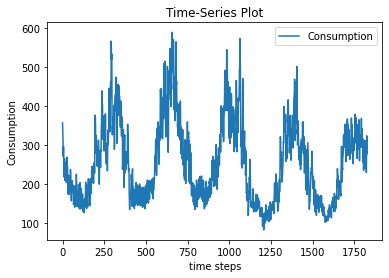

In [5]:
plt.plot(np.arange(0, len(df)), df.Consumption, label='Consumption')
plt.xlabel('time steps')
plt.ylabel('Consumption')
plt.title('Time-Series Plot')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Cumulative Sum Plot')

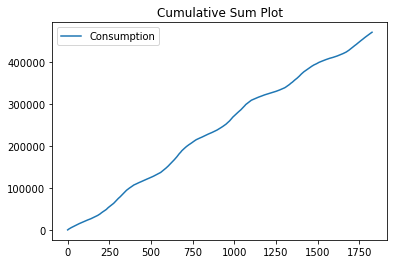

In [6]:
ts = df.cumsum()
ts.plot()
plt.title('Cumulative Sum Plot')

### Moving Point Average Plot

Text(0, 0.5, 'Consumption')

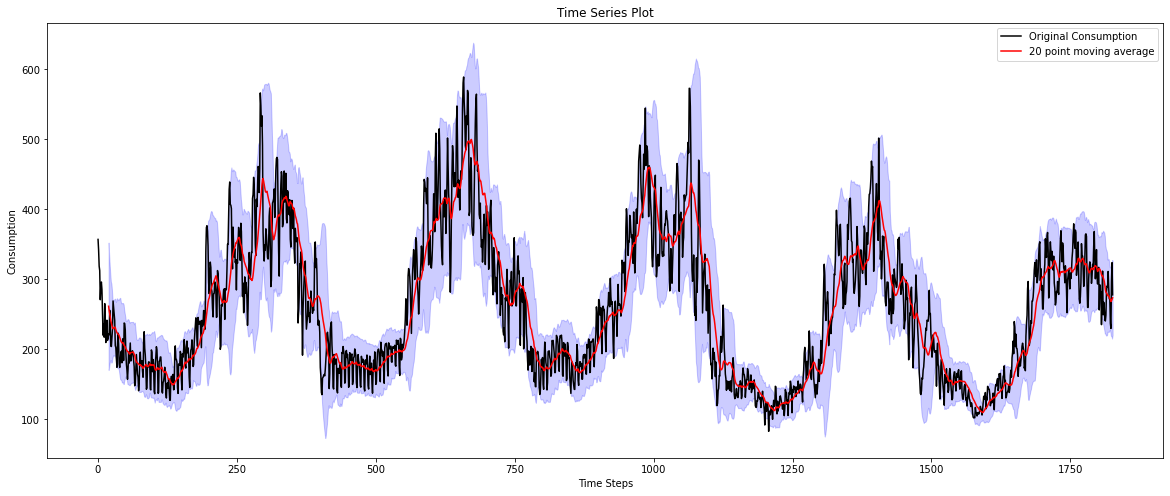

In [7]:
ma = df['Consumption'].rolling(20).mean()

mstd = df['Consumption'].rolling(20).std()

plt.figure(figsize=(20, 8));

plt.plot(np.arange(0, len(df)), df['Consumption'], "k", label="Original Consumption");

plt.plot(ma.index, ma, "r", label="20 point moving average");

plt.fill_between(mstd.index, ma - 2 * mstd, ma + 2 * mstd, color="b", alpha=0.2);

plt.legend()
plt.title('Time Series Plot')
plt.xlabel('Time Steps')
plt.ylabel('Consumption')

### Lag Plot

Text(0.5, 1.0, 'Lag Plot')

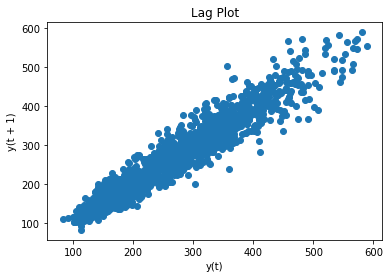

In [8]:
from pandas.plotting import lag_plot, autocorrelation_plot
lag_plot(df.Consumption)
plt.title('Lag Plot')

### AutoCorrelation Plot

Text(0.5, 1.0, 'Autocorrelation')

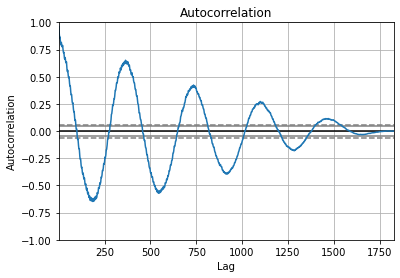

In [9]:
autocorrelation_plot(df.Consumption)
plt.title('Autocorrelation')

## Exploring ARIMA

We need to find the following 2 charecteristics:
1. Stationary points of the data
2. Order of the AR model (by checking autocorrelation plot)

In [10]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_pacf

P-value:  0.08461241579544215


/home/sam37avhvaptuka451/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


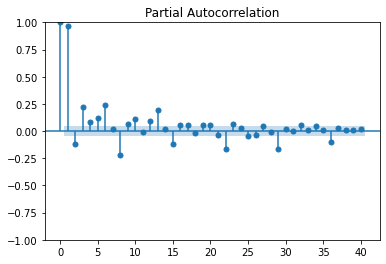

In [11]:
df_stationarityTest = adfuller(df['Consumption'], autolag='AIC')
# Check the value of p-value
print("P-value: ", df_stationarityTest[1])

# find the order of AR model to be trained
partial_autocorr = plot_pacf(df['Consumption'], lags=40)

In [12]:
# Training ARIMA
train_split = 0.8 # using 80% of data for training
train_data = df['Consumption'][:int(len(df)*0.8)]
test_data = df['Consumption'][int(len(df)*0.8):]

# train the model;
arima_model = AutoReg(train_data, lags=140).fit()

# print summary;
print(arima_model.summary())

                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 1461
Model:                   AutoReg(140)   Log Likelihood               -5991.321
Method:               Conditional MLE   S.D. of innovations             22.567
Date:                Mon, 15 Aug 2022   AIC                          12266.642
Time:                        22:37:43   BIC                          13003.075
Sample:                           140   HQIC                         12542.734
                                 1461                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               16.8496      3.691      4.565      0.000       9.616      24.083
Consumption.L1       1.0366      0.028     37.666      0.000       0.983       1.091
Consumption.L2      -0.1835 

## Explore model predictions

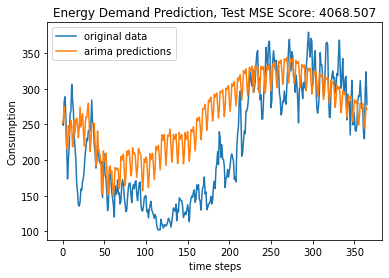

In [36]:
# make predictions
pred = arima_model.predict(start=len(train_data), end=len(df)-1, dynamic=False)
test_mse = mean_squared_error(test_data, pred)
# Plot the prediction vs test data
plt.plot(np.arange(0, len(test_data)), test_data, label='original data')
plt.plot(np.arange(0, len(test_data)), pred, label='arima predictions')
plt.xlabel('time steps')
plt.ylabel('Consumption')
plt.title('Energy Demand Prediction, Test MSE Score: {:.3f}'.format(test_mse))
plt.legend()
plt.savefig('./src/saved_models/arima.png')
plt.show()